# matplotlib - 2D και 3D σχεδίαση σε Python

## Εισαγωγή

Η Matplotlib είναι μια εξαιρετική βιβλιοθήκη γραφικών 2D και 3D για τη δημιουργία επιστημονικών γραφημάτων. Μερικά από τα πολλά πλεονεκτήματα αυτής της βιβλιοθήκης περιλαμβάνουν:

* Εύκολο ξεκίνημα 
* Υποστήριξη για ετικέτες και κείμενα με μορφή $\LaTeX$
* Εξαιρετικός έλεγχος κάθε στοιχείου σε ένα σχήμα, συμπεριλαμβανομένου του μεγέθους του σχήματος και του DPI (Dot per inch).
* Αποτέλεσμα υψηλής ποιότητας υποστηρίζοντας πολλούς τύπους αρχείων, όπως PNG, PDF, SVG, EPS και PGF.
* GUI (Graphic Interface Environment) για διαδραστική εξερεύνηση γραφημάτων.

Ένα από τα βασικά χαρακτηριστικά του matplotlib  είναι ότι όλες οι πτυχές του σχήματος μπορούν να ελεγχθούν *προγραμματιστικά*. Αυτό είναι σημαντικό για την αναπαραγωγιμότητα και βολικό όταν χρειάζεται να ξανατρέξετε το σχήμα με ενημερωμένα δεδομένα ή να αλλάξετε την εμφάνισή του.

Περισσότερες πληροφορίες στην ιστοσελίδα Matplotlib: http://matplotlib.org/

Για να ξεκινήσετε να χρησιμοποιείτε το Matplotlib σε ένα πρόγραμμα Python εισαγάγετε τη λειτουργική μονάδα `matplotlib.pyplot` με το όνομα `plt` :

In [1]:
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np

## Πρώτο plot

Ξεκινάμε αποθηκεύοντας μια αναφορά στο νεοδημιουργημένο παράδειγμα σχήματος στη μεταβλητή `fig` και από αυτήν δημιουργούμε "άξονες" χρησιμοποιώντας τη μέθοδο "add_axes" στην περίπτωση κλάσης "Figure" με στιγμιότυπο (instance) "fig":

In [4]:
x = np.linspace(0, 5, 10)
y = x ** 2

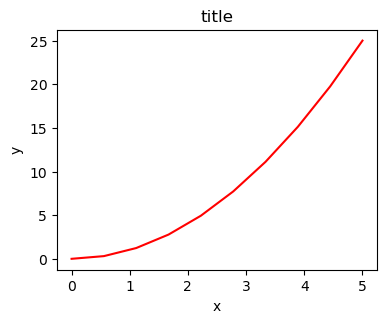

In [5]:
fig = plt.figure()

axes = fig.add_axes([0.1,0.1, 0.5, 0.5]) # αριστερά, κάτω, πλάτος, ύψος (εύρος 0 έως 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

plt.show();

Mπορούμε εύκολα να προσθέσουμε περισσότερους από έναν άξονες στο σχήμα:

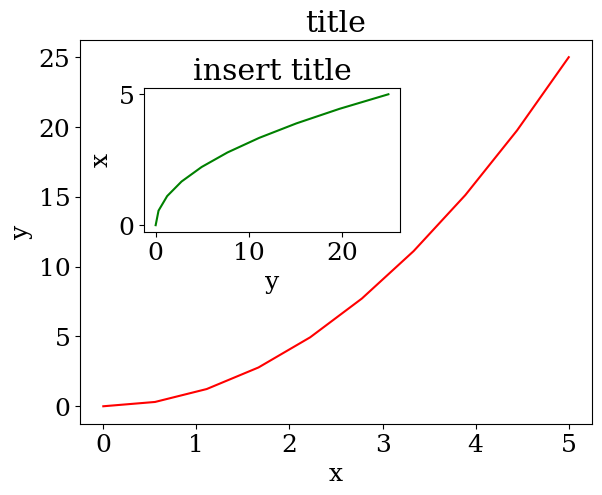

In [9]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # βασικούς άξονες
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # ένθετοι άξονες

# κύρια φιγούρα
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# εισάγω
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

Αν δεν μας ενδιαφέρει να είμαστε σαφείς σχετικά με το πού τοποθετούνται οι άξονες της γραφικής μας παράστασης στον καμβά του σχήματος, τότε μπορούμε να χρησιμοποιήσουμε έναν από τους πολλούς διαχειριστές διάταξης αξόνων στο matplotlib. Το «subplots», τα οποία μπορούν να χρησιμοποιηθούν ως εξής:

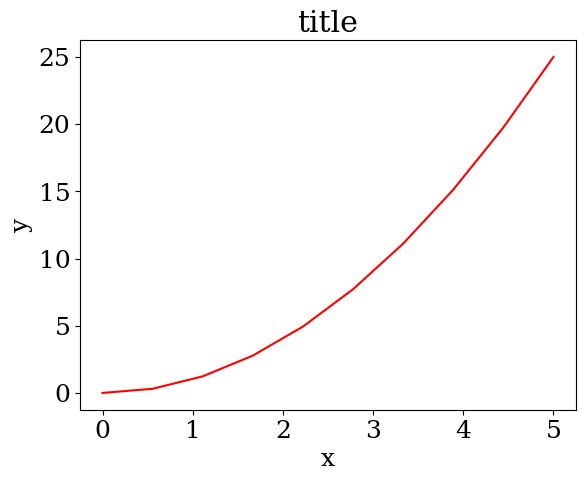

In [10]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

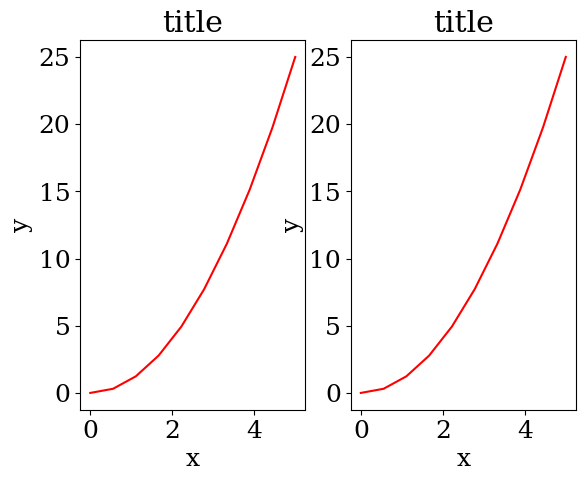

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

Ήταν εύκολο, αλλά δεν είναι τόσο όμορφο με επικαλυπτόμενους άξονες και ετικέτες.

Μπορούμε να το αντιμετωπίσουμε χρησιμοποιώντας τη μέθοδο «fig.tight_layout», η οποία προσαρμόζει αυτόματα τις θέσεις των αξόνων στον καμβά του σχήματος έτσι ώστε να μην υπάρχει επικαλυπτόμενο περιεχόμενο:

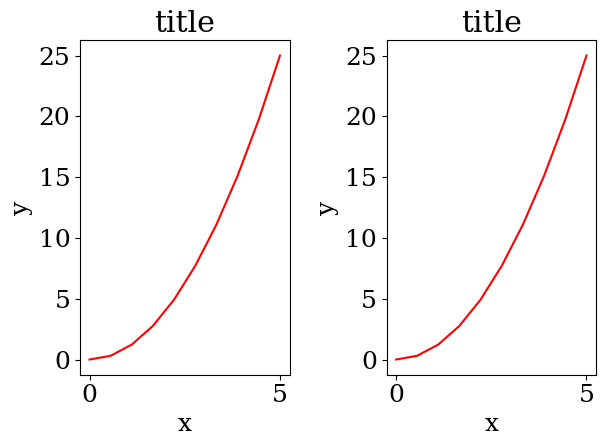

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

### Μέγεθος σχήματος, αναλογία διαστάσεων και DPI

Το Matplotlib επιτρέπει τον καθορισμό της αναλογίας διαστάσεων, του DPI και του μεγέθους του σχήματος όταν δημιουργείται το αντικείμενο «Figure», χρησιμοποιώντας τα ορίσματα λέξης-κλειδιού «figsize» και «dpi». Το "figsize" είναι μια πλειάδα του πλάτους και του ύψους του σχήματος σε ίντσες και το "dpi" είναι οι κουκκίδες ανά ίντσα (pixel ανά ίντσα). Για να δημιουργήσουμε μια εικόνα 800x400 pixel, 100 κουκκίδες ανά ίντσα, μπορούμε να κάνουμε:

In [13]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

Τα ίδια ορίσματα μπορούν επίσης να περάσουν στους διαχειριστές διάταξης, όπως η συνάρτηση «subplots»:

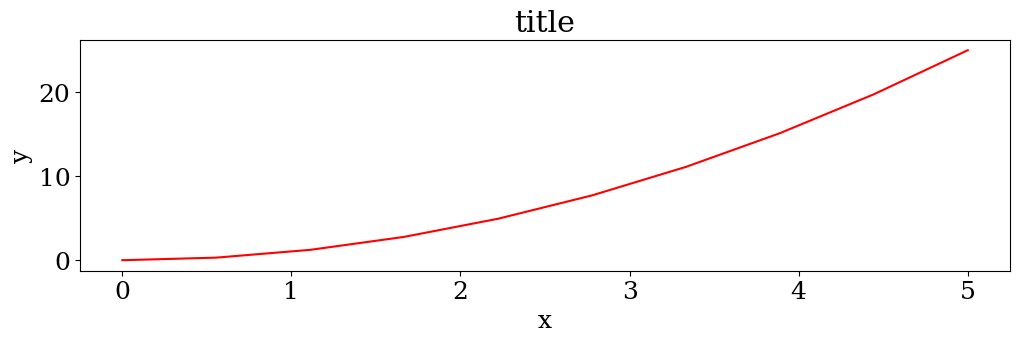

In [14]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

### Αποθήκευση γραφημάτων

Για να αποθηκεύσουμε μια εικόνα σε ένα αρχείο μπορούμε να χρησιμοποιήσουμε τη μέθοδο `savefig` της κλάσης `Figure`:

In [6]:
fig.savefig("filename.png")

Εδώ μπορούμε επίσης να καθορίσουμε προαιρετικά το DPI και να επιλέξουμε μεταξύ διαφορετικών μορφών εξόδου:

In [16]:
fig.savefig("filename.png", dpi=200)

#### Ποιες μορφές είναι διαθέσιμες και ποιες θα πρέπει να χρησιμοποιηθούν για την καλύτερη ποιότητα;

Το Matplotlib μπορεί να δημιουργήσει εξόδους υψηλής ποιότητας σε πολλές μορφές, όπως PNG, JPG, EPS, SVG, PGF και PDF. 

### Υπομνήματα, ετικέτες και τίτλοι

Τώρα που καλύψαμε τα βασικά για το πώς να δημιουργήσετε έναν καμβά γραφήματος και να προσθέσουμε στιγμιότυπα αξόνων στον καμβά, ας δούμε πώς διακοσμούμε ένα γράφημα με τίτλους, ετικέτες αξόνων και legends.

**Τίτλοι γραφημάτων**

Ένας τίτλος μπορεί να προστεθεί σε κάθε άξονα σε ένα σχήμα. Για να ορίσετε τον τίτλο, χρησιμοποιήστε τη μέθοδο "set_title":

In [17]:
ax.set_title("title");

**Ετικέτες άξονα**

Ομοίως, με τις μεθόδους «set_xlabel» και «set_ylabel», μπορούμε να ορίσουμε τις ετικέτες των αξόνων X και Y:

In [18]:
ax.set_xlabel("x")
ax.set_ylabel("y");

**Υπομνήματα**


Χρησιμοποιείτε το όρισμα λέξης κλειδιού "label="label text"" όταν προστίθενται γραφικά ή άλλα αντικείμενα στο σχήμα και, στη συνέχεια, τη μέθοδο "legend" χωρίς ορίσματα για να προσθέσουμε το υπόμνημα στο σχήμα:

In [19]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

Εάν προστεθούν ή αφαιρεθούν καμπύλες από το σχήμα, το υπόμνημα ενημερώνεται αυτόματα ανάλογα.

Η συνάρτηση «legend» λαμβάνει ένα προαιρετικό όρισμα λέξης-κλειδιού «loc» που μπορεί να χρησιμοποιηθεί για να καθορίσει σε ποιο μέρος στο σχήμα θα σχεδιαστεί το υπόμνημα. Οι επιτρεπόμενες τιμές του «loc» είναι αριθμητικοί κωδικοί για τα διάφορα μέρη που μπορεί να σχεδιαστεί το υπόμνημα. Δείτε http://matplotlib.org/users/legend_guide.html#legend-location για λεπτομέρειες. Μερικές από τις πιο κοινές τιμές "loc" είναι:

In [20]:
ax.legend(loc=0) # αφήστε το matplotlib να αποφασίσει τη βέλτιστη τοποθεσία
ax.legend(loc=1) # πάνω δεξιά γωνία
ax.legend(loc=2) # πάνω αριστερή γωνία
ax.legend(loc=3) # κάτω αριστερή γωνία
ax.legend(loc=4) # κάτω δεξιά γωνία
# .. πολλές περισσότερες επιλογές είναι διαθέσιμες

Το παρακάτω σχήμα δείχνει πώς να χρησιμοποιήσετε τον τίτλο του σχήματος, τις ετικέτες αξόνων και τα υπομνήματα όπως περιγράφονται παραπάνω:

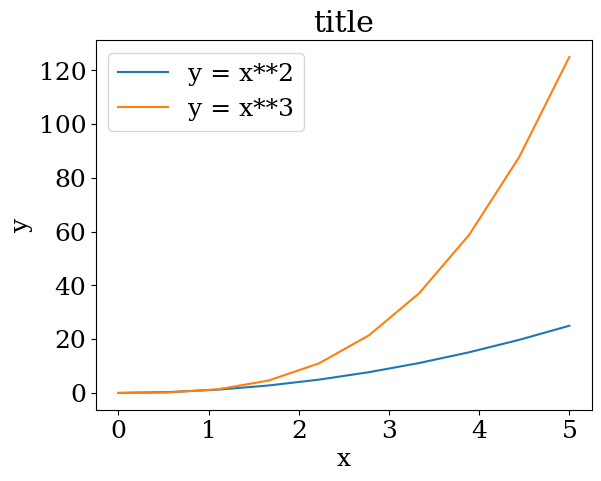

In [21]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # πάνω αριστερή γωνία
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

### Μορφοποίηση κειμένου: LaTeX, μέγεθος γραμματοσειράς, οικογένεια γραμματοσειρών

Το παραπάνω σχήμα είναι λειτουργικό, αλλά δεν πληρεί (ακόμη) τα κριτήρια για ένα σχήμα που χρησιμοποιείται σε μια δημοσίευση. Πρώτα και κύρια, πρέπει να έχουμε κείμενο μορφοποιημένο LaTeX και δεύτερον, πρέπει να μπορούμε να προσαρμόσουμε το μέγεθος της γραμματοσειράς ώστε να εμφανίζεται σωστά σε μια δημοσίευση.

Το Matplotlib έχει μεγάλη υποστήριξη για το LaTeX. Το μόνο που χρειάζεται να κάνουμε είναι να χρησιμοποιήσουμε τα δολάρια (βλέπε Latex) που ενσωματώνουν το LaTeX σε οποιοδήποτε κείμενο (υπόμνημα, τίτλο, ετικέτα κ.λπ.). Για παράδειγμα, `"$y=x^3$"`.

Αλλά εδώ μπορεί να αντιμετωπίσουμε ένα ελαφρώς λεπτό πρόβλημα με τον κώδικα LaTeX και τις συμβολοσειρές κειμένου Python. Στο LaTeX, χρησιμοποιούμε συχνά την ανάστροφη κάθετο σε εντολές, για παράδειγμα `\alpha` για να δημιουργήσουμε το σύμβολο $\alpha$. Αλλά η ανάστροφη κάθετος έχει ήδη νόημα στις συμβολοσειρές Python (ο χαρακτήρας του κώδικα διαφυγής esc). Για να αποφύγουμε να καταστρέψει η Python τον κώδικα latex μας, πρέπει να χρησιμοποιήσουμε "ακατέργαστες" (raw) συμβολοσειρές κειμένου. Οι συμβολοσειρές ακατέργαστου κειμένου προσαρτώνται με ένα '`r`', όπως "r"\alpha"` ή "r'\alpha"" αντί για ""\alpha"" ή ""\alpha":

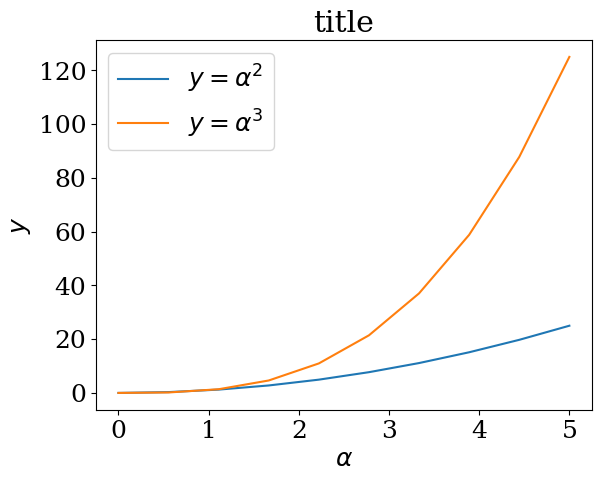

In [22]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # πάνω αριστερή γωνία
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

Μπορούμε επίσης να αλλάξουμε το συνολικό μέγεθος της γραμματοσειράς και την οικογένεια γραμματοσειρών, η οποία ισχύει για όλα τα στοιχεία κειμένου σε ένα σχήμα (ετικέτες επιλογής, ετικέτες και τίτλοι αξόνων, υπομνήματα κ.λπ.):

In [23]:
# Ενημερώστε τις παραμέτρους διαμόρφωσης matplotlib:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

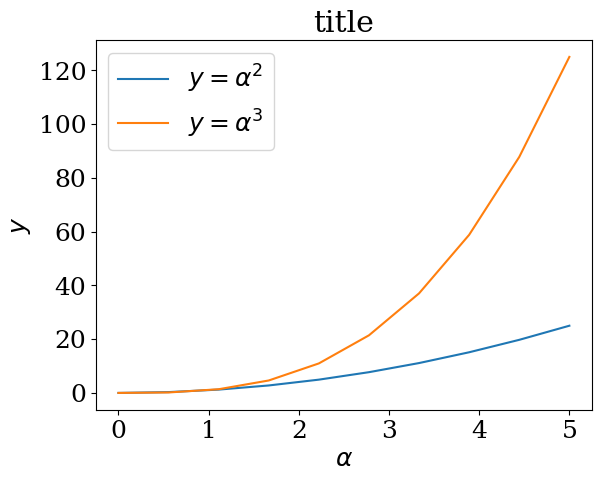

In [24]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # πάνω αριστερή γωνία
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

In [25]:
# restore
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

### Ρύθμιση χρωμάτων, πλάτη γραμμών, τύπων γραμμών

#### Χρώματα

Με το matplotlib, μπορούμε να ορίσουμε τα χρώματα των γραμμών και άλλων γραφικών στοιχείων με διάφορους τρόπους. Πρώτα απ 'όλα, μπορούμε να χρησιμοποιήσουμε τη σύνταξη που μοιάζει με MATLAB όπου το "b" σημαίνει μπλε, το "g" σημαίνει πράσινο, κ.λπ. Το API του MATLAB για την επιλογή στυλ γραμμής υποστηρίζεται επίσης: όπου, για παράδειγμα, "b. -" σημαίνει μια μπλε γραμμή με τελείες:

In [26]:
# Χρώμα και στυλ γραμμής στυλ MATLAB
ax.plot(x, x**2, 'b.-') # μπλε γραμμή με τελείες
ax.plot(x, x**3, 'g--') # πράσινη διακεκομμένη γραμμή

Μπορούμε επίσης να ορίσουμε τα χρώματα με τα ονόματά τους ή τους δεκαεξαδικούς κώδικες RGB και προαιρετικά να παρέχουμε μια τιμή alpha (a=1 έντονο χρώμα α=0 διαφανές)  χρησιμοποιώντας τα ορίσματα λέξης-κλειδιού «color» και «alpha»:

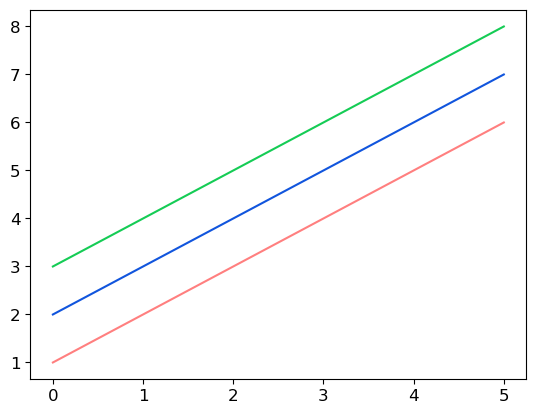

In [44]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # μισοδιαφανές κόκκινο
ax.plot(x, x+2, color="#1155dd") # RGB δεκαεξαδικός κώδικας για ένα μπλε χρώμα
ax.plot(x, x+3, color="#15cc55") # RGB δεκαεξαδικός κώδικας για πρασινωπό χρώμα

[RGB Color Codes Chart](https://www.rapidtables.com/web/color/RGB_Color.html)

#### Στυλ γραμμής και δείκτη

Για να αλλάξουμε το πλάτος γραμμής, μπορούμε να χρησιμοποιήσουμε το όρισμα λέξης-κλειδιού «πλάτος γραμμής» ή «lw». Το στυλ γραμμής μπορεί να επιλεγεί χρησιμοποιώντας τα ορίσματα λέξης-κλειδιού «linestyle» ή «ls»:

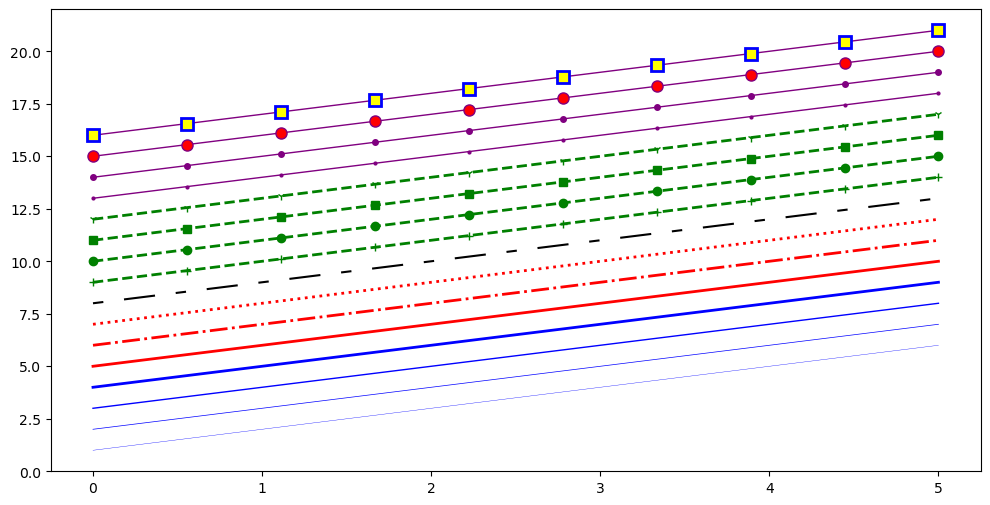

In [15]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# Επιλογές τύπου γραμμής "-", "--", "-.", ":", "βήματα"
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# Προσαρμοσμένη παύλα
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # μορφή: μήκος γραμμής, μήκος διαστήματος, ...

# Διάφορα σύμβολα δεικτών: δείκτης = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# μέγεθος και χρώμα δείκτη
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Έλεγχος της εμφάνισης του άξονα

Η εμφάνιση των αξόνων είναι μια σημαντική πτυχή μιας φιγούρας που συχνά χρειάζεται να τροποποιούμε για να κάνουμε μια δημοσίευση με ποιοτικά  γραφήματα. Πρέπει να μπορούμε να ελέγχουμε πού τοποθετούνται τα tick και οι ετικέτες, να τροποποιούμε το μέγεθος της γραμματοσειράς και πιθανώς τις ετικέτες που χρησιμοποιούνται στους άξονες. Σε αυτήν την ενότητα θα εξετάσουμε τον έλεγχο αυτών των ιδιοτήτων σε ένα matplotlib γράφημα.

#### Εύρος γραφήματος

Το πρώτο πράγμα που ίσως θέλουμε να διαμορφώσουμε είναι τα εύρη των αξόνων. Μπορούμε να το κάνουμε αυτό χρησιμοποιώντας τις μεθόδους "set_ylim" και "set_xlim" στο αντικείμενο του άξονα ή "axis('tight')" για αυτόματη λήψη περιοχών αξόνων "στενώς προσαρμοσμένων":

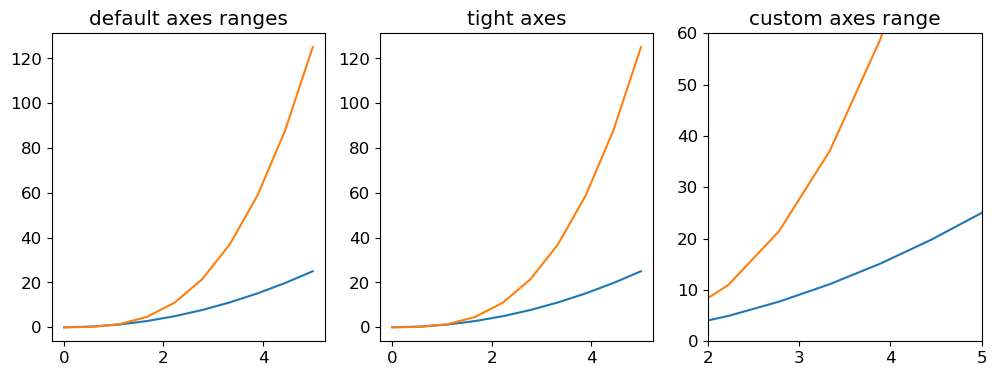

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

#### Λογαριθμική κλίμακα

Είναι επίσης δυνατό να ορίσουμε μια λογαριθμική κλίμακα για έναν ή και τους δύο άξονες. Αυτή η λειτουργικότητα είναι στην πραγματικότητα μόνο μία εφαρμογή ενός γενικότερου συστήματος μετασχηματισμού στο Matplotlib. Καθεμία από τις κλίμακες των αξόνων ρυθμίζεται χωριστά χρησιμοποιώντας μεθόδους «set_xscale» και «set_yscale» που δέχονται μία παράμετρο (με την τιμή «log» σε αυτήν την περίπτωση):

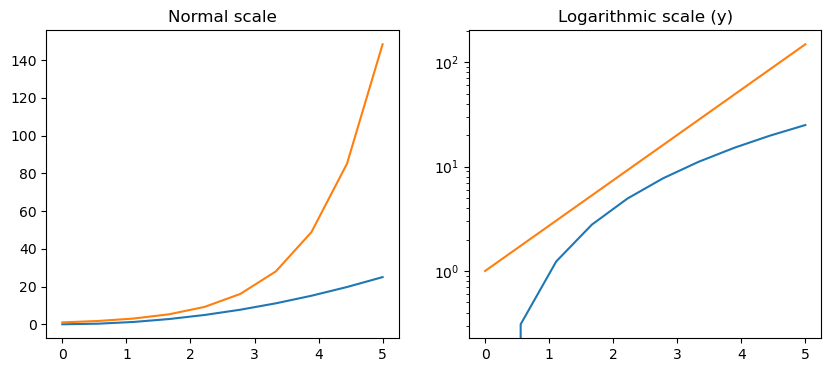

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

## Άσκηση 

1. Φτιάξτε ένα γράφημα 3 διαγραμμάτων που απεικονίζουν συναρτήσεις της επιλογής σου που να βρίσκονται το ένα κάτω από το άλλο.
Επέλεξε ότι χρωμα και τυπο γραμμής θέλεις με βάση τα παραπάνω.
2. Αποθήκευσε αυτά τα διαγράμματα με διάφορα 200, 300, 500 dpi σε 3 png αρχεία
3. Αλλαξε τις κλίμακες τους σε λογαριθμική και πράξε το ίδιο.

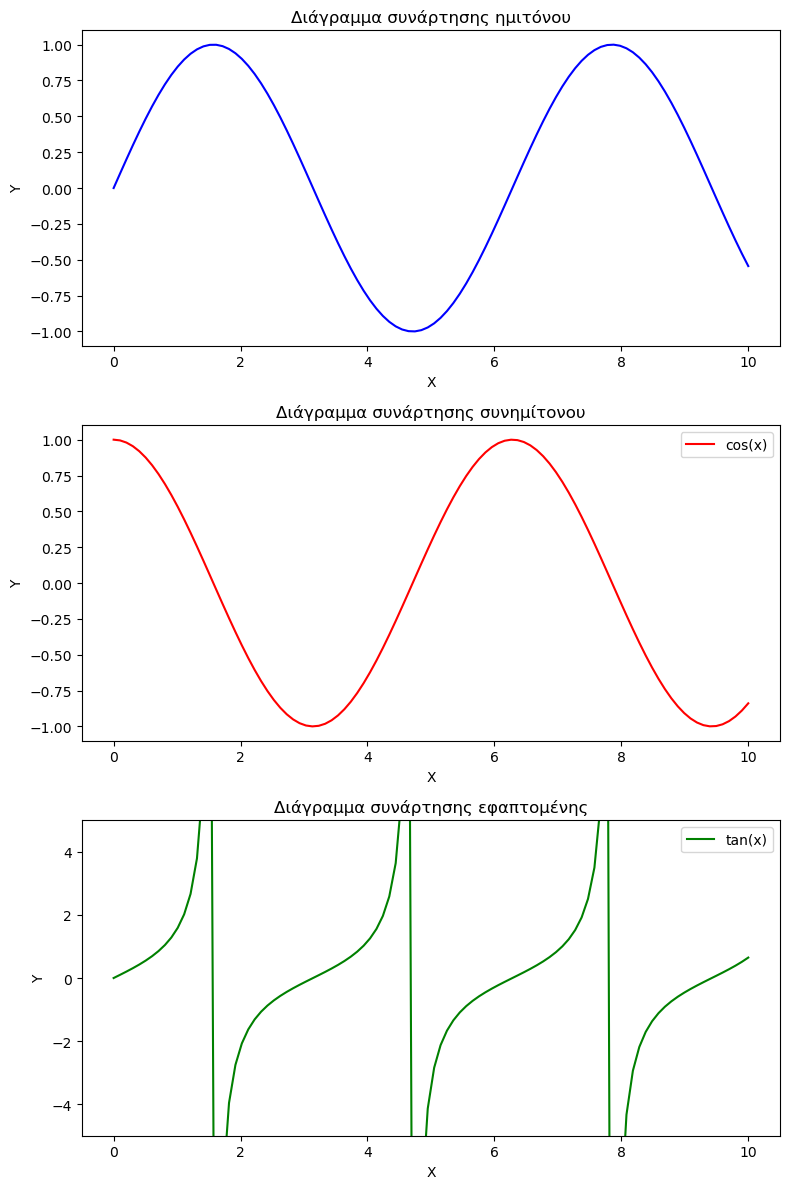

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Δημιουργία δεδομένων
x = np.linspace(0, 10, 100)
y1 = 
y2 = 
y3 = 

# Δημιουργία γραφημάτων
fig, ax = plt.subplots(..., ..., figsize=(8, 12))

ax[0].plot(x, y1, label='', color='')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('')



# Εμφάνιση γραφημάτων
plt.tight_layout()
plt.show()


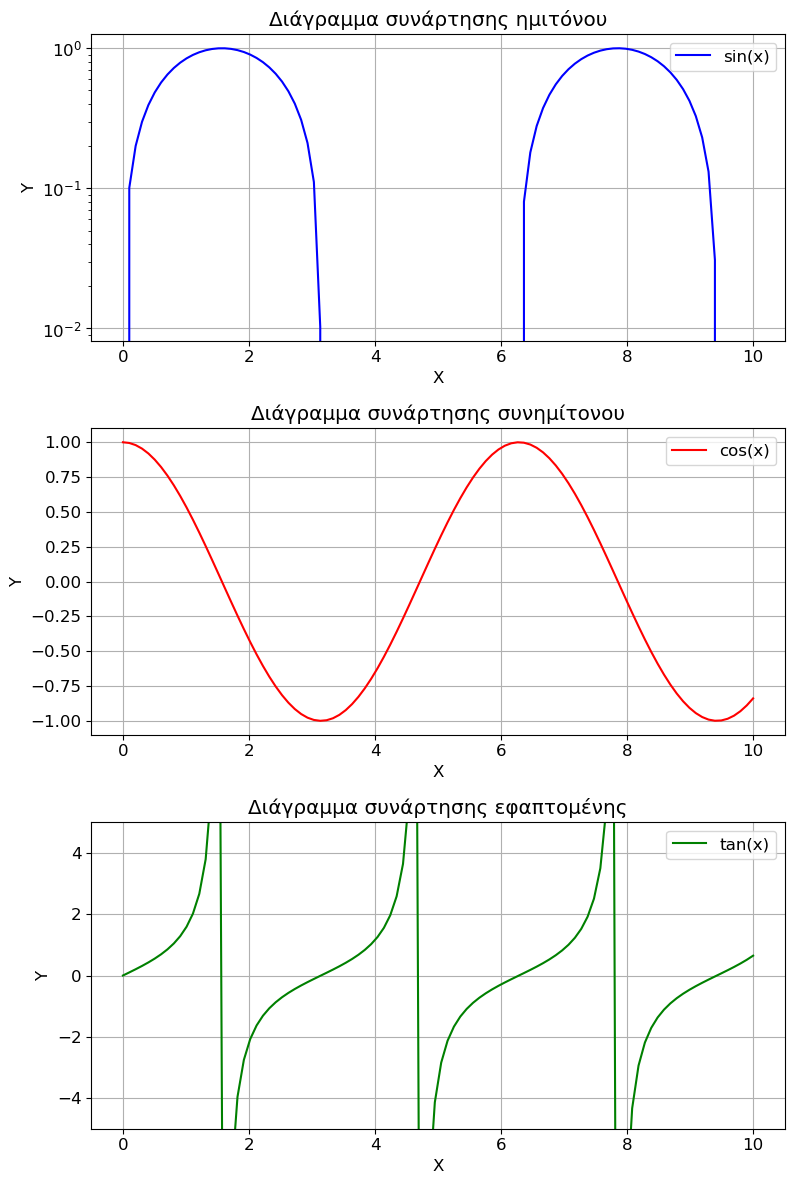

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Δημιουργία δεδομένων
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# Δημιουργία γραφημάτων
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

ax[0].plot(x, y1, label='sin(x)', color='b')
ax[0].set_yscale("log")
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Διάγραμμα συνάρτησης ημιτόνου')
ax[0].legend()
ax[0].grid()

ax[1].plot(x, y2, label='cos(x)', color='r')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_title('Διάγραμμα συνάρτησης συνημίτονου')
ax[1].legend()
ax[1].grid()

ax[2].plot(x, y3, label='tan(x)', color='g')
ax[2].set_xlabel('X')
ax[2].set_ylabel('Y')
ax[2].set_title('Διάγραμμα συνάρτησης εφαπτομένης')
ax[2].set_ylim(-5, 5)  # Περιορισμός άξονα Y για καλύτερη οπτικοποίηση
ax[2].legend()
ax[2].grid()

# Εμφάνιση γραφημάτων
plt.tight_layout()
plt.show()


In [12]:
fig.savefig("filename200.png", dpi=200)